### An example showing the plot_precision_recall_curve method used by a scikit-learn classifier

In this example, we'll be plotting a `precision_recall_curve` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.metrics.plot_precision_recall_curve` method.

In [1]:
from sklearn.datasets import (
    make_classification,
    load_breast_cancer as data_2_classes,
    load_iris as data_3_classes,
    load_digits as data_10_classes,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import numpy as np
np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

# Import scikit-plot
import scikitplot as sp
sp.__version__

'0.5.dev0+git.20250623.4ca0c21'

In [2]:
sp.metrics.plot_precision_recall?

Signature:
sp.metrics.plot_precision_recall(
    y_true,
    y_probas,
    *,
    class_index=None,
    class_names=None,
    multi_class=None,
    to_plot_class_index=None,
    title='Precision-Recall AUC Curves',
    title_fontsize='large',
    text_fontsize='medium',
    cmap=None,
    show_labels=True,
    digits=4,
    plot_micro=True,
    plot_macro=False,
    pr_auc='pr_auc',
    ap_score=True,
    plot_chance_level=True,
    **kwargs,
)
Docstring:
Generates the Precision-Recall AUC Curves from labels and predicted scores/probabilities.

Precision-Recall curve plots the precision against the recall for different threshold values.
The area under the curve (AUC) represents the classifier's performance. This function supports
both binary and multiclass classification tasks.

Parameters
----------
y_true : array-like, shape (n_samples,)
    Ground truth (correct) target values.

y_probas : array-like, shape (n_samples,) or (n_samples, n_classes)
    Predicted probabilities for each 

In [3]:
# Load the data
X, y = data_3_classes(return_X_y=True, as_frame=False)

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=0
)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((75, 804), (75, 804), (75,), (75,))

In [4]:
# Create an instance of the LogisticRegression
model = make_pipeline(
    StandardScaler(),
    LinearSVC(random_state=random_state),
)
model = model.fit(X_train, y_train)

In [5]:
np.unique(y_train)

array([0, 1, 2])

In [6]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn import metrics

y_val_prob = model.decision_function(X_val)

precision, recall, _ = precision_recall_curve(
    y_val==0, y_val_prob[:, 0],
    # pos_label=model.classes_[1]
)
average_precision = metrics.average_precision_score(
    y_val==0, y_val_prob[:, 0]
)
pr_display = PrecisionRecallDisplay(
    precision=precision,
    recall=recall,
    average_precision=average_precision
).plot()

ax = plt.gca()
precision, recall, _ = precision_recall_curve(
    y_val==1, y_val_prob[:, 1],
    # pos_label=model.classes_[1]
)
average_precision = metrics.average_precision_score(
    y_val==1, y_val_prob[:, 1],
)
pr_display = PrecisionRecallDisplay(
    precision=precision,
    recall=recall,
    average_precision=average_precision
).plot(ax = ax)


ax = plt.gca()
precision, recall, _ = precision_recall_curve(
    y_val==2, y_val_prob[:, 2],
    # pos_label=model.classes_[1]
)
average_precision = metrics.average_precision_score(
    y_val==2, y_val_prob[:, 2],
)
pr_display = PrecisionRecallDisplay(
    precision=precision,
    recall=recall,
    average_precision=average_precision
).plot(ax = ax)

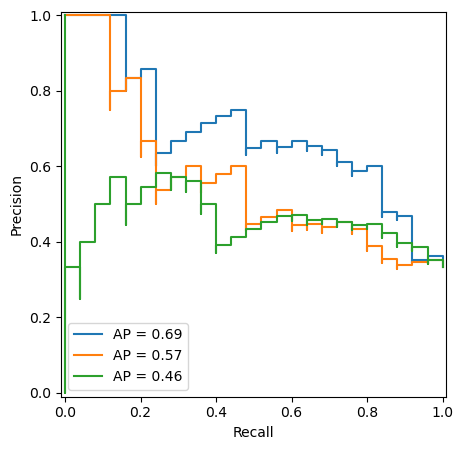

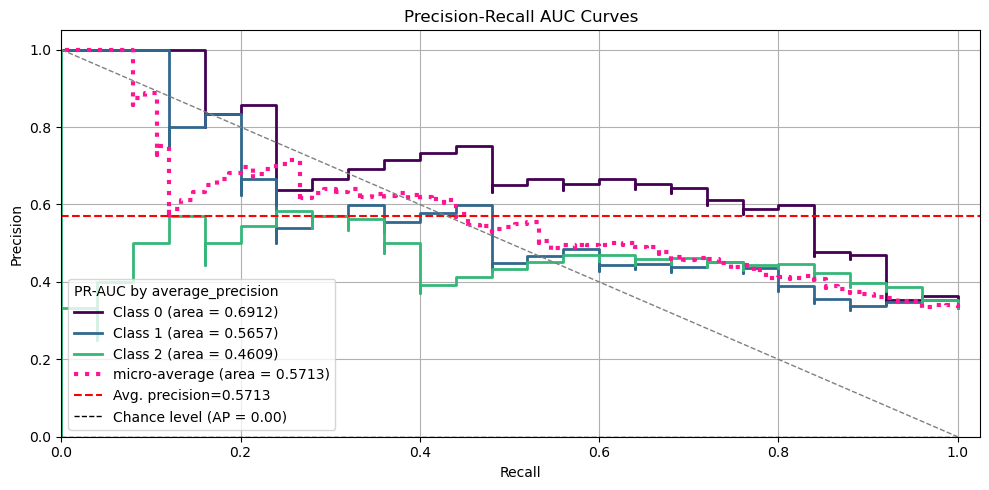

In [7]:
# Perform predictions
y_val_prob = model.decision_function(X_val)

# Plot!
ax = sp.metrics.plot_precision_recall(
    y_val, y_val_prob,
    pr_auc='average_precision',
)

In [8]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn import metrics

y_val_prob = model.decision_function(X_val)

precision, recall, _ = precision_recall_curve(
    y_val==0, y_val_prob[:, 0],
    # pos_label=model.classes_[1]
)
average_precision = metrics.auc(
    recall,precision,
)
pr_display = PrecisionRecallDisplay(
    precision=precision,
    recall=recall,
    average_precision=average_precision
).plot()


ax = plt.gca()
precision, recall, _ = precision_recall_curve(
    y_val==1, y_val_prob[:, 1],
    # pos_label=model.classes_[1]
)
average_precision = metrics.auc(
    recall,precision,
)
pr_display = PrecisionRecallDisplay(
    precision=precision,
    recall=recall,
    average_precision=average_precision
).plot(ax = ax)


ax = plt.gca()
precision, recall, _ = precision_recall_curve(
    y_val==2, y_val_prob[:, 2],
    # pos_label=model.classes_[1]
)
average_precision = metrics.auc(
    recall,precision,
)
pr_display = PrecisionRecallDisplay(
    precision=precision,
    recall=recall,
    average_precision=average_precision
).plot(ax = ax)

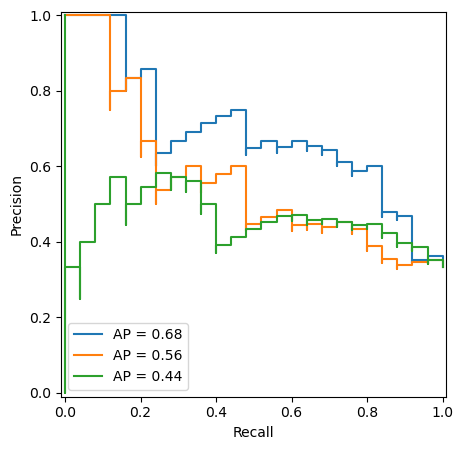

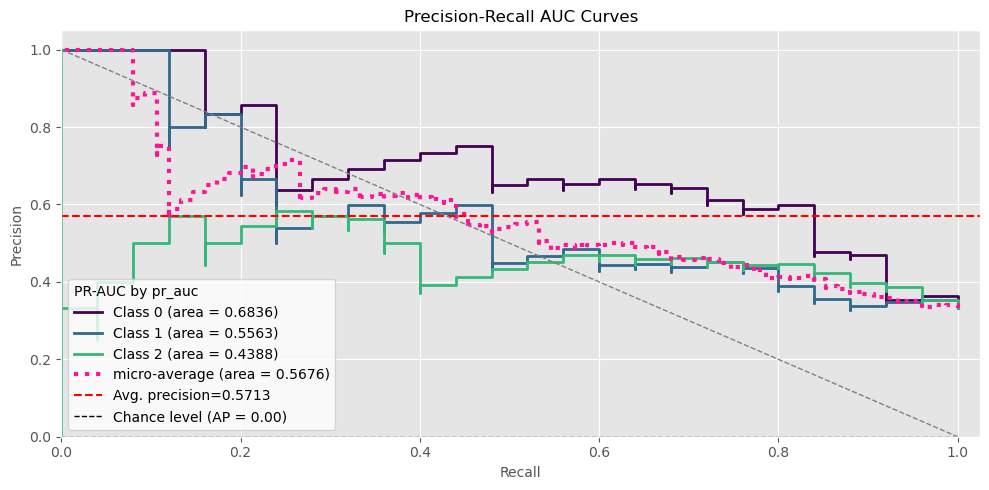

In [9]:
# Create an instance of the LogisticRegression
model = make_pipeline(
    StandardScaler(),
    LinearSVC(random_state=random_state)
)
model = model.fit(X_train, y_train)

# Perform predictions
y_val_prob = model.decision_function(X_val)

# Plot!
ax = sp.metrics.plot_precision_recall(
    y_val, y_val_prob,
    area='pr_auc',
	plot_style='ggplot',
);

In [10]:
# Load the data
X, y = data_10_classes(return_X_y=True, as_frame=False)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, random_state=0
)

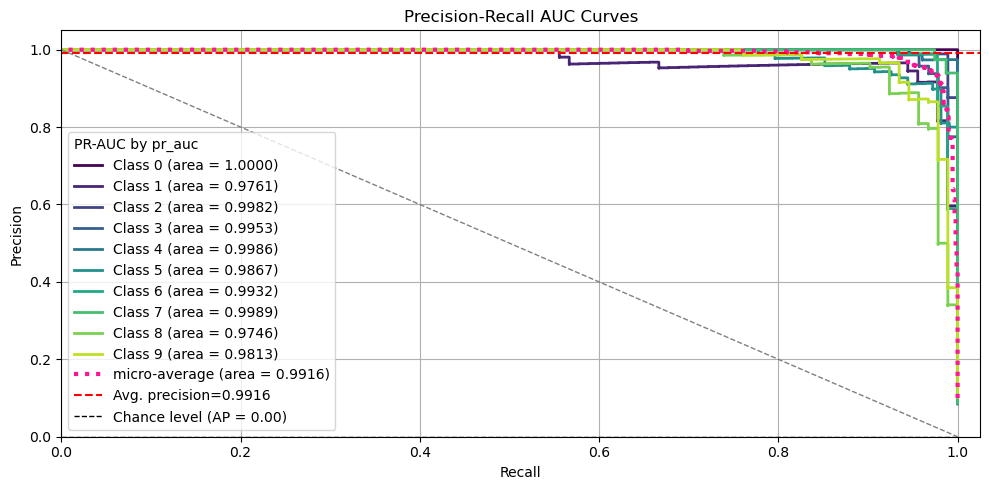

In [11]:
# Create an instance of the LogisticRegression
model = (
    LogisticRegression(max_iter=int(1e5), random_state=0)
    .fit(X_train, y_train)
)

# Perform predictions
y_val_prob = model.predict_proba(X_val)

# Plot!
ax = sp.metrics.plot_precision_recall(
    y_val, y_val_prob
)

## Keras

E0000 00:00:1750683050.913699   61729 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750683050.926625   61729 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750683050.955008   61729 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750683050.955054   61729 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750683050.955061   61729 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750683050.955065   61729 computation_placer.cc:177] computation placer already registered. Please check linka

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


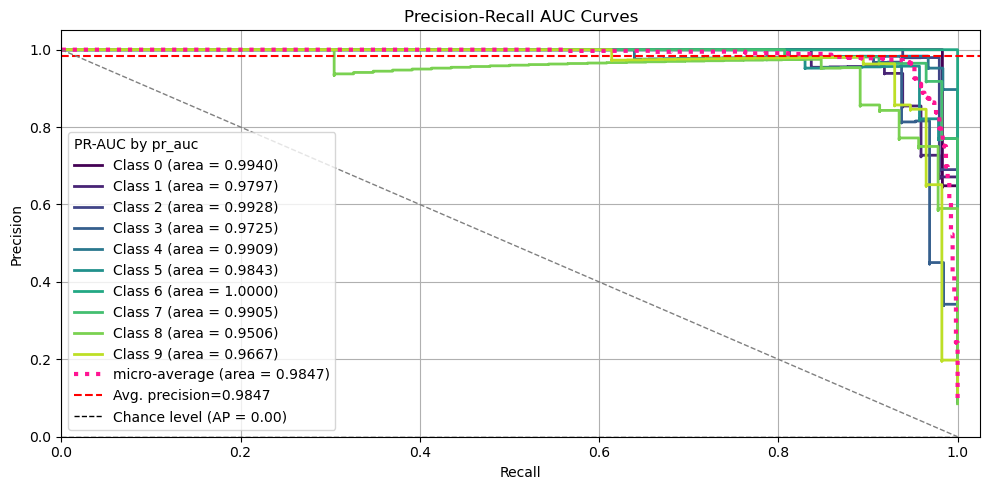

<Axes: title={'center': 'Precision-Recall AUC Curves'}, xlabel='Recall', ylabel='Precision'>

In [12]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scikitplot as sp

# Load the digits dataset
X, y = load_digits(return_X_y=True)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Convert labels to one-hot encoding
Y_train = tf.keras.utils.to_categorical(y_train)
Y_val = tf.keras.utils.to_categorical(y_val)

# Define a simple TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    X_train, Y_train,
    batch_size=64,
    epochs=10,
    validation_data=(X_val, Y_val),
    verbose=0
)

# Predict probabilities on the validation set
y_probas = model.predict(X_val)

# Plot precision-recall curves
sp.metrics.plot_precision_recall(y_val, y_probas)